In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
bicisXcel20 = pd.read_excel('data/AccidentesBicicletas_2020.xlsx')
bicisXcel21 = pd.read_excel('data/AccidentesBicicletas_2021.xlsx')
bicisXcel22 = pd.read_excel('data/AccidentesBicicletas_2022.xlsx')
bicisXcel23 = pd.read_excel('data/AccidentesBicicletas_2023.xlsx')

# Leemos los valores del fichero y los cargamos en un dataframe
bicis20 = pd.DataFrame(bicisXcel20)
bicis21 = pd.DataFrame(bicisXcel21)
bicis22 = pd.DataFrame(bicisXcel22)
bicis23 = pd.DataFrame(bicisXcel23)

dfBicis = pd.concat([bicis20, bicis21, bicis22, bicis23])
dfBicis

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehículo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,tipo_vehiculo
0,2020S000044,2020-01-02,07:30:00,CALL. ALBASANZ / CALL. RUFINO GONZALEZ,23,20.0,SAN BLAS-CANILLEJAS,Colisión frontal,Despejado,Bicicleta,Conductor,De 40 a 44 años,Hombre,7,Asistencia sanitaria sólo en el lugar del acci...,4.468640e+08,4.476526e+09,N,NaN,NaN
1,2020S000151,2020-01-04,13:45:00,"CALL. ORENSE, 12",12,6.0,TETUÁN,Caída,Despejado,Bicicleta,Conductor,De 21 a 24 años,Hombre,7,Asistencia sanitaria sólo en el lugar del acci...,4.410475e+08,4.477835e+09,N,NaN,NaN
2,2020S000153,2020-01-04,12:10:00,"CALL. NUESTRA SEÑORA DE VALVERDE, 209",209,8.0,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Bicicleta,Conductor,De 10 a 14 años,Hombre,1,Atención en urgencias sin posterior ingreso,4.419754e+08,4.484542e+09,N,NaN,NaN
3,2020S000153,2020-01-04,12:10:00,"CALL. NUESTRA SEÑORA DE VALVERDE, 209",209,8.0,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Bicicleta,Conductor,De 45 a 49 años,Hombre,2,Ingreso inferior o igual a 24 horas,4.419754e+08,4.484542e+09,N,NaN,NaN
4,2020S000212,2020-01-04,13:30:00,"M-605, KM 1,600 SOMONTES (CAMINO)",20,8.0,FUENCARRAL-EL PARDO,Caída,Despejado,Bicicleta,Conductor,De 35 a 39 años,Hombre,6,Asistencia sanitaria inmediata en centro de sa...,4.391659e+08,4.484558e+09,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12183,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,NaN,Conductor,De 25 a 29 años,Hombre,14,Sin asistencia sanitaria,4.425613e+05,4.471591e+06,N,NaN,Motocicleta hasta 125cc
12184,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,NaN,Conductor,De 40 a 44 años,Hombre,7,Asistencia sanitaria sólo en el lugar del acci...,4.425613e+05,4.471591e+06,N,NaN,Turismo
12185,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,NaN,Pasajero,De 40 a 44 años,Mujer,14,Sin asistencia sanitaria,4.425613e+05,4.471591e+06,N,NaN,Turismo
12186,2023S014588,2023-03-17,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,7,Asistencia sanitaria sólo en el lugar del acci...,4.414998e+05,4.478870e+06,N,NaN,NaN


In [5]:
# Realizamos un backup del dataFrame de bicis
dfBicisBackup = dfBicis

In [6]:
# chequeamos los valores nulos de nuestro dataSet
dfBicis.isnull().sum()

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      1
cod_distrito                1
distrito                    1
tipo_accidente              0
estado_meteorológico        0
tipo_vehículo           13066
tipo_persona                0
rango_edad                  0
sexo                        0
cod_lesividad               0
lesividad                   0
coordenada_x_utm            2
coordenada_y_utm            2
positiva_alcohol           56
positiva_droga          14790
tipo_vehiculo            1871
dtype: int64

In [7]:
dfBicisML = pd.DataFrame({'fecha': dfBicis['fecha'],
                          'horaE': dfBicis['hora'],
                          'distrito': dfBicis['cod_distrito'],  
                          'accidente': dfBicis['tipo_accidente'],
                          'meteorología': dfBicis['estado_meteorológico'],
                          'sexo': dfBicis['sexo'],
                          'lesividad': dfBicis['cod_lesividad']})

Hombre         9398
Mujer          4156
Desconocido    1286
Name: sexo, dtype: int64

In [8]:
# chequeamos los valores nulos de nuestro dataSet
dfBicisML.isnull().sum()

fecha           0
horaE           0
distrito        1
accidente       0
meteorología    0
sexo            0
lesividad       0
dtype: int64

In [9]:
dfBicisML = dfBicisML.dropna(subset = ['distrito'])

In [10]:
dfBicisML['año'] = [t.year for t in pd.DatetimeIndex(dfBicisML.fecha)]
dfBicisML['año'] = dfBicisML['año'].map({2020:2020, 2021:2021, 2022:2022, 2023:2023})

In [11]:
dfBicisML['hora'] = pd.to_datetime(dfBicisML['horaE'], format='%H:%M:%S').dt.hour

In [12]:
dfBicisML['dia'] = dfBicisML['fecha'].dt.dayofweek

In [13]:
dfBicisML = dfBicisML.drop(['fecha', 'horaE'], axis=1)
dfBicisML

,distrito,accidente,meteorología,sexo,lesividad,año,hora,dia
0,20.0,Colisión frontal,Despejado,Hombre,7,2020,7,3
1,6.0,Caída,Despejado,Hombre,7,2020,13,5
2,8.0,Colisión múltiple,Despejado,Hombre,1,2020,12,5
3,8.0,Colisión múltiple,Despejado,Hombre,2,2020,12,5
4,8.0,Caída,Despejado,Hombre,6,2020,13,5
...,...,...,...,...,...,...,...,...
12183,13.0,Alcance,Despejado,Hombre,14,2023,13,4
12184,13.0,Alcance,Despejado,Hombre,7,2023,13,4
12185,13.0,Alcance,Despejado,Mujer,14,2023,13,4
12186,5.0,Alcance,Despejado,Desconocido,7,2023,11,4


In [14]:
dfBicisML['cod_accidente'] = dfBicisML['accidente'].map({'Colisión fronto-lateral':1,'Alcance':2,'Colisión lateral':3,'Caída':4,'Choque contra obstáculo fijo':5,'Atropello a persona':6,'Colisión múltiple':7,'Colisión frontal':8,'Otro':9,'Solo salida de la vía':10,'Vuelco':11,'Atropello a animal':12})

In [15]:
dfBicisML['meteorología'].value_counts()

Despejado         13231
Nublado             872
Lluvia débil        592
LLuvia intensa       74
Se desconoce         70
Name: meteorología, dtype: int64

In [16]:
dfBicisML['cod_sexo'] = dfBicisML['sexo'].map({'Mujer':0,'Hombre':1,'Desconocido':2})

In [17]:
dfBicisML['cod_meteorologia'] = dfBicisML['meteorología'].map({'Despejado':0,'Nublado':1,'Lluvia débil':2,'LLuvia intensa':3,'Se desconoce':4})

In [18]:
dfBicisML = dfBicisML.drop(['meteorología'], axis=1)

In [19]:
dfBicisML.astype(int)

ValueError: invalid literal for int() with base 10: 'Colisión frontal'

In [21]:
dfConjuntoML = pd.DataFrame({'distrito': dfBicisML['distrito'],
                          'año': dfBicisML['año'],
                          'hora': dfBicisML['hora'],  
                          'dia': dfBicisML['dia'],
                          'accidente': dfBicisML['cod_accidente'],
                          'meteo': dfBicisML['cod_meteorologia'],
                          'sexo': dfBicisML['cod_sexo']})

In [22]:
corr = dfConjuntoML.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,distrito,año,hora,dia,accidente,meteo,sexo
distrito,1.000000,0.077658,0.017994,-0.022344,-0.015109,-0.001029,0.038741
año,0.077658,1.000000,-0.060006,-0.021698,-0.013045,-0.019555,0.018911
hora,0.017994,-0.060006,1.000000,-0.068322,-0.042051,0.020183,-0.070943
dia,-0.022344,-0.021698,-0.068322,1.000000,0.018494,0.028386,0.037070
accidente,-0.015109,-0.013045,-0.042051,0.018494,1.000000,0.006733,0.068872
meteo,-0.001029,-0.019555,0.020183,0.028386,0.006733,1.000000,0.011740
sexo,0.038741,0.018911,-0.070943,0.037070,0.068872,0.011740,1.000000


In [32]:
dfConjuntoML.corr()

,distrito,año,hora,dia,accidente,meteo,sexo,lesividad
distrito,1.000000,0.077658,0.017994,-0.022344,-0.015109,-0.001029,0.051894,-0.007987
año,0.077658,1.000000,-0.060006,-0.021698,-0.013045,-0.019555,0.051099,-0.210125
hora,0.017994,-0.060006,1.000000,-0.068322,-0.042051,0.020183,-0.076941,-0.031447
dia,-0.022344,-0.021698,-0.068322,1.000000,0.018494,0.028386,0.048025,-0.003307
accidente,-0.015109,-0.013045,-0.042051,0.018494,1.000000,0.006733,0.094990,0.015957
meteo,-0.001029,-0.019555,0.020183,0.028386,0.006733,1.000000,0.014201,0.016717
sexo,0.051894,0.051099,-0.076941,0.048025,0.094990,0.014201,1.000000,0.000744
lesividad,-0.007987,-0.210125,-0.031447,-0.003307,0.015957,0.016717,0.000744,1.000000


In [61]:
dfBicisML.describe()

,distrito,lesividad,año,hora,dia,cod_accidente,cod_sexo,cod_meteorologia
count,14839.000000,14839.000000,14839.000000,14839.000000,14839.000000,14839.000000,14839.000000,14839.000000
mean,9.603006,8.855853,2022.639127,14.090774,2.981805,3.361210,0.806658,0.172384
std,5.714428,4.928158,0.848654,5.591359,1.941403,2.287231,0.573855,0.555884
min,1.000000,1.000000,2020.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.000000,6.000000,2023.000000,10.000000,1.000000,1.000000,0.000000,0.000000
50%,9.000000,7.000000,2023.000000,15.000000,3.000000,3.000000,1.000000,0.000000
75%,14.000000,14.000000,2023.000000,19.000000,5.000000,5.000000,1.000000,0.000000
max,21.000000,77.000000,2023.000000,23.000000,6.000000,12.000000,2.000000,4.000000


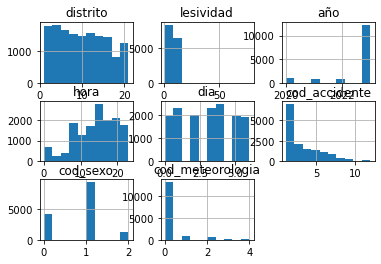

In [64]:
dfBicisML.hist()
plt.show()

In [23]:
# Veamos realmente cuantas tipos de lesividad tenemos:
print(dfBicisML.groupby('lesividad').size())

lesividad
1     1115
2     1514
3      435
4       13
5      536
6      913
7     3813
14    6499
77       1
dtype: int64


C:\Users\javi4\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\javi4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


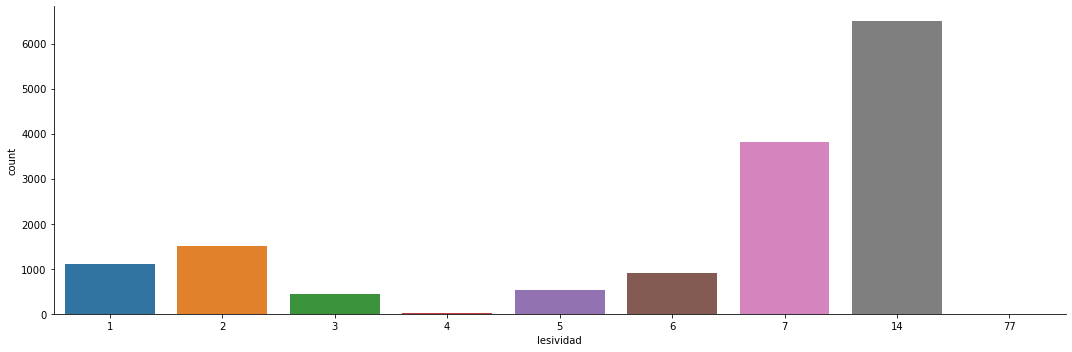

In [24]:
sb.factorplot('lesividad',data=dfBicisML,kind="count", aspect=3)

# Preparamos las entradas
#### Creamos nuestro X e y de entrada y los sets de entrenamiento y test. Para ello vamos a intentar predicir la lesividad pues es lo que queremos intentar evitar

In [31]:
X = dfBicisML[['distrito','año', 'hora', 'dia', 'cod_accidente', 'cod_sexo', 'cod_meteorologia']].values
y = dfBicisML['lesividad'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Usemos k-Nearest Neighbor con Scikit Learn
#### Definimos el valor de k en 7 y creamos nuestro clasificador.
NOTA: Utilizamos la clase KNeighborsClassifier de SciKit Learn puesto que nuestras etiquetas son valores discretos (estrellas del 1 al 5). Pero deben saber que también existe la clase KneighborsRegressor para etiquetas con valores continuos.

En este ejercicio creamos un modelo con Python para procesar y clasificar puntos de un conjunto de entrada con el algoritmo k-Nearest Neighbor. Cómo su nombre en inglés lo dice, se evaluán los “k vecinos más cercanos” para poder clasificar nuevos puntos. Al ser un algoritmo supervisado debemos contar con suficientes muestras etiquetadas para poder entrenar el modelo con buenos resultados. Este algoritmo es bastante simple y -como vimos antes- necesitamos muchos recursos de memoria y cpu para mantener el dataset “vivo” y evaluar nuevos puntos. Esto no lo hace recomendable para conjuntos de datos muy grandes. En el ejemplo, sólo utilizamos 2 dimensiones de entrada para poder graficar y ver en dos dimensiones cómo se obtienen y delimitan los grupos. Finalmente pudimos hacer nuevas predicciones y a raíz de los resultados, comprender mejor la problemática planteada.

In [33]:
n_neighbors = 19
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.49
Accuracy of K-NN classifier on test set: 0.44


Elegir el mejor valor de k
(sobre todo importante para desempatar o elegir los puntos frontera!)
Antes vimos que asignamos el valor n_neighbors=7 como valor de “k” y obtuvimos buenos resultados. ¿Pero de donde salió ese valor?. Pues realmente tuve que ejecutar este código que viene a continuación, donde vemos distintos valores k y la precisión obtenida.

([<matplotlib.axis.XTick at 0x160f90f34c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

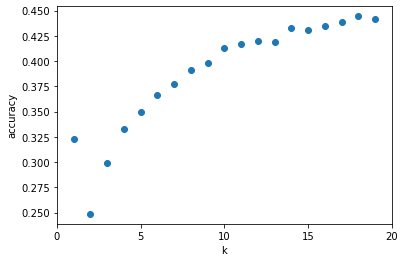

In [32]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Probando el modelo
Una vez que se entrena el modelo, podemos usar la función 'predecir' en nuestro modelo para hacer predicciones en nuestros datos de prueba. Como se vio al inspeccionar 'y' anteriormente son las más probables de ocurrir, 7 indica el tipo de lesividad "Asistencia sanitaria sólo en el lugar del accidente" y 14 indica el tipo de lesividad "Sin asistencia sanitaria". Para ahorrar espacio, solo mostraremos las primeras 5 predicciones de nuestro conjunto de prueba, de aquí deducimos que para los próximos 5 accidentes dos sería de lesividad 7 y 3 de lesividad 14.

In [125]:
knn.predict(X_test)[0:7]

array([ 7, 14,  7, 14, 14, 14, 14], dtype=int64)

In [91]:
h = .02  # step size in the mesh 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
print(clf.predict_proba(X_test))

[[0.15384614 0.15384627 0.         ... 0.46153829 0.15384624 0.        ]
 [0.15384616 0.15384623 0.         ... 0.46153833 0.15384625 0.        ]
 [0.23076912 0.15384624 0.         ... 0.38461535 0.15384629 0.        ]
 ...
 [0.15384613 0.15384626 0.         ... 0.46153829 0.15384627 0.        ]
 [0.23076913 0.15384621 0.         ... 0.38461538 0.15384628 0.        ]
 [0.23076915 0.07692322 0.         ... 0.46153837 0.15384628 0.        ]]


In [114]:
#crear un nuevo modelo KNN 
knn_cv = KNeighborsClassifier(n_neighbors=13)
#entrenar modelo con cv de 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=7)
#imprime cada puntaje cv (precisión) y promedialos 
print(cv_scores) 
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

C:\Users\javi4\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(("The least populated class in y has only %d"


[0.39339623 0.35896226 0.36320755 0.38962264 0.39433962 0.38066038
 0.3916942 ]
cv_scores mean:0.3816975535172086


In [123]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  14   21    0    0    1    4   94  151]
 [  18   31    1    0    0    5   98  220]
 [   1   10    1    0    0    1   29   64]
 [   0    0    0    0    0    0    0    3]
 [   2   11    0    0    0    0   35  100]
 [   6   20    1    0    0    6   75  137]
 [  26   40    1    0    0    6  242  631]
 [  10   36    0    0    2    9  245 1302]]
              precision    recall  f1-score   support

           1       0.18      0.05      0.08       285
           2       0.18      0.08      0.11       373
           3       0.25      0.01      0.02       106
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00       148
           6       0.19      0.02      0.04       245
           7       0.30      0.26      0.27       946
          14       0.50      0.81      0.62      1604

    accuracy                           0.43      3710
   macro avg       0.20      0.15      0.14      3710
weighted avg       0.34      0.43      0.36      3710



C:\Users\javi4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\javi4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\javi4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RANDOM FOREST

El segundo modelo de machine learning se va a desarrollar usando un algoritmo de clasificación Random Forest, que se basa en una combinación de árboles predictores, tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos.

Utilizaremos el modelo RandomForrestClassifier de SkLearn.


In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [129]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(f"Random Forest Accuracy: {model.score(X_test, y_test)}")

Random Forest Accuracy: -0.1788343928551892


In [131]:
y_pred = model.predict(X_test)
y_pred

array([ 3.515     , 11.1225    ,  4.35      , ...,  7.72866667,
        7.37347619, 12.49707143])

In [135]:
mse = mean_squared_error(y_test, y_pred)
mse

28.189393669323103

In [118]:
# Crear el modelo con 100 arboles
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True, 
                               verbose=2,
                               max_features = 'auto')
# a entrenar!
model.fit(X_train, y_train)
print(f"RF Accuracy: {model.score(X_test, y_test)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


RF Accuracy: 0.37358490566037733


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
Con este algoritmo obtenemos un accuracy de 37%.

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['linear'], 'C':[1, 100, 1000],
              'gamma': [1e-3, 1e-4]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, param_grid, cv=5)
clf.fit(X_train, y_train)
df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),
                pd.DataFrame(clf.cv_results_["mean_test_score"],
                              columns=["Accuracy"])],
               axis=1)

C:\Users\javi4\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


# Regresion lineal simple

In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.18084209  4.87301764  0.75406166 -0.14552949 -0.23376946  0.07741993
 -0.31093318]
Independent term: 
 4.299940581353823
Mean squared error: 22.50
Variance score: 0.08


In [36]:
#Vamos a comprobar:
y_validation = regr.predict(X_test)
print(y_validation)

[6.15020997 9.526154   9.01772794 ... 9.70024319 7.99936276 9.01957588]
